# Task 3: Implement K-Nearest Neighbors (KNN) Classifier

## Library

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Data

In [2]:
# Storage directory
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

In [3]:
# Load dataset tanpa menyimpan ulang
train_data = pd.read_csv(os.path.join(DATA_DIR, "iris_train.csv"))
test_data = pd.read_csv(os.path.join(DATA_DIR, "iris_test.csv"))

## Split Data

In [4]:
# Pisahkan fitur dan target
X_train = train_data.iloc[:, :-1]  # Semua kolom kecuali species
y_train = train_data.iloc[:, -1]   # Kolom species sebagai target
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

## Model, Predict, & Evaluate

In [5]:
# Mencoba berbagai nilai K dan membandingkan hasilnya
k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

In [6]:
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Evaluasi model
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    
    print(f"\n🔹 K = {k}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



🔹 K = 1
Accuracy: 0.9667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


🔹 K = 3
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔹 K = 5
Accuracy: 1.0000
Conf

## Visualization

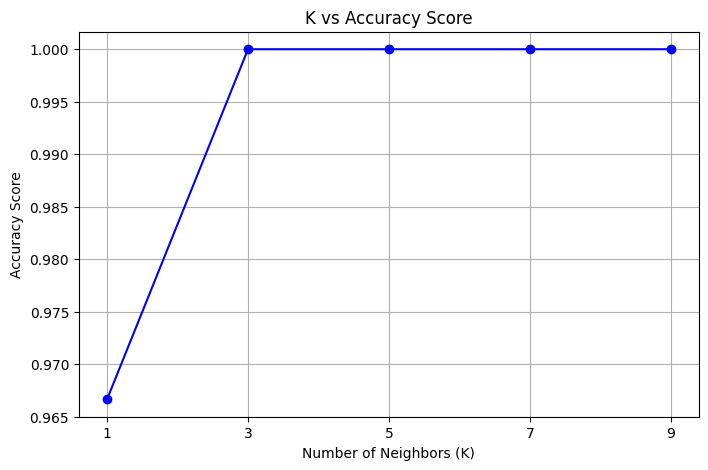

In [ ]:
# Plot hasil perbandingan nilai K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy Score")
plt.title("K vs Accuracy Score")
plt.xticks(k_values)
plt.grid(True)
mplcursors.cursor(hover=True)  # Menambahkan efek hover pada titik data
plt.legend()
plt.show()